### do_it_pandas
    한국에서 pandas관련해서 만든 책

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 개념정리
    column = 열, 세로방향 데이터 , feature(개별데이터 특성값) 예) 이름, 나이, 키, 성적...
    row = 행, 가로방향 데이터, 개별데이터  예) 학생_A, 학생_B....

In [2]:
df = pd.read_csv('./data/gapminder.tsv', sep = '\t')   # sep = 구분자
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [4]:
df.dtypes   # type만 추출, info사용시 불필요

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

In [5]:
df.shape

(1704, 6)

In [6]:
type(df)

pandas.core.frame.DataFrame

### col 선택
    1개 선택 : df['col명'] or df.col명
    여러개 선택 : df[['col1','col2',..]]    

In [7]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [8]:
df.lifeExp

0       28.801
1       30.332
2       31.997
3       34.020
4       36.088
         ...  
1699    62.351
1700    60.377
1701    46.809
1702    39.989
1703    43.487
Name: lifeExp, Length: 1704, dtype: float64

In [13]:
df[['lifeExp','year','pop']].head()   #.tail() : 밑에 부분 출력

,lifeExp,year,pop
0,28.801,1952,8425333
1,30.332,1957,9240934
2,31.997,1962,10267083
3,34.020,1967,11537966
4,36.088,1972,13079460


### row 선택
    1. df.iloc[row index 번호]
        * 여러개를 선택시 [[row 번호, row 번호 ...]]
    2. df.loc[row명]
        * 여러개를 선택시 [[row명, row명 ...]]

In [16]:
df.iloc[2]

country      Afghanistan
continent           Asia
year                1962
lifeExp           31.997
pop             10267083
gdpPercap        853.101
Name: 2, dtype: object

In [17]:
df.loc[2]

country      Afghanistan
continent           Asia
year                1962
lifeExp           31.997
pop             10267083
gdpPercap        853.101
Name: 2, dtype: object

##### 0, 99, 999 번째 row를 출력

In [19]:
df.iloc[[0,99,999]]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
99,Bangladesh,Asia,1967,43.453,62821884,721.186086
999,Mongolia,Asia,1967,51.253,1149500,1226.041130


### 행과 열을 같이 선택
    1. df.loc[row명, col명]
        *여러개 선택시 : [[row명, row명..],[col명,col명...]]
    2. df.iloc[row번호, col번호]
        *여러개 선택시 : [[row번호, row번호..],[col번호,col번호...]]

##### 100번 인덱스에 있는 year, lifeExp 출력

In [25]:
df.loc[100,['year','lifeExp']]      # 1개 기준에 []를 사요하면 dataframe형태로 출력

year         1972
lifeExp    45.252
Name: 100, dtype: object

In [24]:
df.iloc[100,2:4]

year         1972
lifeExp    45.252
Name: 100, dtype: object

##### row - 0,99,999 / col - 0,3,5 출력

In [26]:
df.iloc[[0,99,999],[0,3,5]]

,country,lifeExp,gdpPercap
0,Afghanistan,28.801,779.445314
99,Bangladesh,43.453,721.186086
999,Mongolia,51.253,1226.041130


In [28]:
df.loc[[0,99,999],['country','lifeExp','gdpPercap']]

,country,lifeExp,gdpPercap
0,Afghanistan,28.801,779.445314
99,Bangladesh,43.453,721.186086
999,Mongolia,51.253,1226.041130


### Grouping

##### 연도별 평균수명의 평균값을 출력

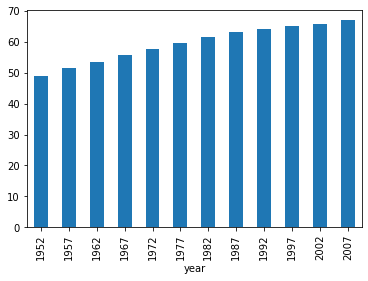

In [30]:
df.groupby('year')['lifeExp'].mean().plot(kind='bar')

In [34]:
grouped = df.groupby('year')
grouped.lifeExp.agg('mean')   #'mean'대신 np.mean 사용가능

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

##### 데이터를 연도, 지역별로 세분화해서 lifeExp과 gdpPercap을 출력

In [40]:
df.groupby(['year','continent'])[['lifeExp','gdpPercap']].mean().head(10)

lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455

In [46]:
df.groupby(['year','continent'])['lifeExp'].count().head()

year  continent
1952  Africa       52
      Americas     25
      Asia         33
      Europe       30
      Oceania       2
Name: lifeExp, dtype: int64

In [47]:
s = pd.Series(['banana',42],index=['fruit','number'])
s

fruit     banana
number        42
dtype: object

In [59]:
Scientists = {
    'Name':['Rosaline Franklin','William Gosset'],
    'Occupation':['Chemist','Statician'],
    'Born' : ['1920-07-25','1876-06-16'],
    'Died' : ['1958-04-16','1937-10-16'],
    'Age' : [37,61]
}

df = pd.DataFrame(Scientists,index=['A','B'])
df

,Name,Occupation,Born,Died,Age
A,Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
B,William Gosset,Statician,1876-06-16,1937-10-16,61


In [60]:
df.columns

Index(['Name', 'Occupation', 'Born', 'Died', 'Age'], dtype='object')

In [61]:
df.index

Index(['A', 'B'], dtype='object')

### df.set_index('col명')
    col을 index로 설정, 원본미반영

In [62]:
df.set_index('Name',inplace = True)
df

,Occupation,Born,Died,Age
Name,,,,
Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
William Gosset,Statician,1876-06-16,1937-10-16,61


In [65]:
df.drop('Age',axis=1,inplace = True)
df

,Occupation,Born,Died
Name,,,
Rosaline Franklin,Chemist,1920-07-25,1958-04-16
William Gosset,Statician,1876-06-16,1937-10-16


### 날짜형식의 Data로 변경(str -> date)
    pd.to_datetime(df[col]) -> 원본미반영

In [70]:
df.Born = pd.to_datetime(df['Born'])
df.Died = pd.to_datetime(df['Died'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Rosaline Franklin to William Gosset
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Occupation  2 non-null      object        
 1   Born        2 non-null      datetime64[ns]
 2   Died        2 non-null      datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 64.0+ bytes


In [83]:
age= df['Died'].dt.year-df['Born'].dt.year     # dt.year -> 날짜형식에서 year만 추출
age

Name
Rosaline Franklin    38
William Gosset       61
dtype: int64

In [82]:
df['Age'] = age
df

,Occupation,Born,Died,Age
Name,,,,
Rosaline Franklin,Chemist,1920-07-25,1958-04-16,38
William Gosset,Statician,1876-06-16,1937-10-16,61


In [84]:
df['Age'].max()

61

In [85]:
df['Age'].min()

38

In [86]:
df['Age'].mean()

49.5

In [87]:
df['Age'].std()

16.263455967290593

In [90]:
df = pd.read_csv('./data/scientists.csv')
df

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        8 non-null      object
 1   Born        8 non-null      object
 2   Died        8 non-null      object
 3   Age         8 non-null      int64 
 4   Occupation  8 non-null      object
dtypes: int64(1), object(4)
memory usage: 448.0+ bytes


##### 평균나이 보다 나이가 많은 사람의 데이터를 출력

In [94]:
df[df.Age>df.Age.mean()]

,Name,Born,Died,Age,Occupation
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


### Broadcasting
    데이터 간 shape이 다른 경우, shape의 확장을 통해 shape을 일치시켜 연산을 실시한다.
    연산은 element끼리 실시

In [98]:
df.Age

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

In [97]:
df.Age + 10

0     47
1     71
2    100
3     76
4     66
5     55
6     51
7     87
Name: Age, dtype: int64

In [99]:
df

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


##### 나이가 많은 순으로 데이터를 정리
### sort_values(col, ascending)

In [102]:
df.sort_values('Age',ascending =False)

,Name,Born,Died,Age,Occupation
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist


##### 평균나이 이상의 데이터 출력

In [104]:
df[df.Age>df.Age.mean()]

,Name,Born,Died,Age,Occupation
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [108]:
df.drop(1) # 원본 미반영, axis의 기본은 row

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [107]:
df

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


##### scients.csv 파일로 저장  & 불러오기

In [ ]:
df.to_csv('scients.csv')

In [ ]:
df=pd.read_csv('scients.csv')

### pickle로 저장 & 불러오기

In [ ]:
df.to_pickle('scients.pickle')

In [ ]:
df = pd.read_pickle('scients.pickle')

### tsv로 저장 & 불러오기

In [ ]:
df.to_csv('scients.tsv',sep = '\t')

In [ ]:
df = pd.read_csv('scients.tsv',sep='\t')

## 데이터 병합
    1)concat
    2)merge

### concat
    병합 방법 설정시 -> join = ? 으로함

In [110]:
df1 = pd.read_csv('./data/concat_1.csv')
df2 = pd.read_csv('./data/concat_2.csv')
df3 = pd.read_csv('./data/concat_3.csv')

In [111]:
df1

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [112]:
df2

,A,B,C,D
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7


In [113]:
df3

,A,B,C,D
0,a8,b8,c8,d8
1,a9,b9,c9,d9
2,a10,b10,c10,d10
3,a11,b11,c11,d11


##### concat을 활용, 세개의 df를 세로방향과 가로방향으로 병합

In [116]:
pd.concat([df1,df2,df3])

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7
0,a8,b8,c8,d8
1,a9,b9,c9,d9


In [117]:
pd.concat([df1,df2,df3],axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


##### df1 밑에 a4,b4,c4,d4를 병합

In [147]:
s = pd.DataFrame(['a4','b4','c4','d4'],index=('A','B','C','D')).T

pd.concat([df1,s])

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,a4,b4,c4,d4


### ,ignore_index, df.reset_index(drop=True)
    1),ignore_index = True  => 합칠때 합쳐지는 df의 index를 무시
    2) .reset_index(drop=True) => df의 index를 번호로 변화

In [148]:
pd.concat([df1,df2,df3],ignore_index = True)

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [155]:
pd.concat([df1,df2,df3]).reset_index(drop=True)

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [154]:
pd.concat([df1,df2,df3],axis=1,ignore_index=True)

,0,1,2,3,4,5,6,7,8,9,10,11
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


#### concat 시 columns명이나 index이름이 서로 다른 경우

In [158]:
df2.columns=['E','F','G','H']
df3.columns=['A','C','F','H']
pd.concat([df1,df2,df3])

,A,B,C,D,E,F,G,H
0,a0,b0,c0,d0,NaN,NaN,NaN,NaN
1,a1,b1,c1,d1,NaN,NaN,NaN,NaN
2,a2,b2,c2,d2,NaN,NaN,NaN,NaN
3,a3,b3,c3,d3,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,a4,b4,c4,d4
1,NaN,NaN,NaN,NaN,a5,b5,c5,d5
2,NaN,NaN,NaN,NaN,a6,b6,c6,d6
3,NaN,NaN,NaN,NaN,a7,b7,c7,d7
0,a8,NaN,b8,NaN,NaN,c8,NaN,d8
1,a9,NaN,b9,NaN,NaN,c9,NaN,d9


#### 이름이 동일한 col만 concat

In [159]:
pd.concat([df1,df2,df3],join='inner')

""
0
1
2
3
0
1
2
3
0
1


In [161]:
pd.concat([df1,df3],join='inner')

,A,C
0,a0,c0
1,a1,c1
2,a2,c2
3,a3,c3
0,a8,b8
1,a9,b9
2,a10,b10
3,a11,b11


#### 인덱스가 서로다른 df를 row방향으로 concat
    인덱스를 기준으로 동일한 인덱스에 concat된다.
        *완전하게 concat하려면 index통일이 필요

In [162]:
df1.index = [0,1,2,3]
df2.index = [4,5,6,7]
df3.index = [0,2,5,7]

In [167]:
pd.concat([df1,df2,df3],axis =1)      

,A,B,C,D,E,F,G,H,A,C,F,H
0,a0,b0,c0,d0,NaN,NaN,NaN,NaN,a8,b8,c8,d8
1,a1,b1,c1,d1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a2,b2,c2,d2,NaN,NaN,NaN,NaN,a9,b9,c9,d9
3,a3,b3,c3,d3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,a4,b4,c4,d4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,a5,b5,c5,d5,a10,b10,c10,d10
6,NaN,NaN,NaN,NaN,a6,b6,c6,d6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,a7,b7,c7,d7,a11,b11,c11,d11


In [170]:
pd.concat([df1,df3],axis =1,join='inner')      

,A,B,C,D,A,C,F,H
0,a0,b0,c0,d0,a8,b8,c8,d8
2,a2,b2,c2,d2,a9,b9,c9,d9


In [171]:
pd.concat([df2,df3],axis =1,join='inner')

,E,F,G,H,A,C,F,H
5,a5,b5,c5,d5,a10,b10,c10,d10
7,a7,b7,c7,d7,a11,b11,c11,d11


### merge
    특정 칼럼값을 기준으로 merge

In [172]:
person = pd.read_csv('./data/survey_person.csv')
site = pd.read_csv('./data/survey_site.csv')
survey = pd.read_csv('./data/survey_survey.csv')
visited = pd.read_csv('./data/survey_visited.csv')

In [180]:
person
site
survey
visited

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [182]:
visited_subset = visited.loc[[0,2,6]]

##### site와 visited_subset를 merge

In [189]:
pd.merge(site,visited_subset,left_on = 'name',right_on='site')

,name,lat,long,ident,site,dated
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08
1,DR-3,-47.15,-126.72,734,DR-3,1939-01-07
2,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14


##### visited, site를 merge

In [190]:
visited

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [191]:
site

,name,lat,long
0,DR-1,-49.85,-128.57
1,DR-3,-47.15,-126.72
2,MSK-4,-48.87,-123.40


In [194]:
pd.merge(visited,site,left_on = 'site', right_on='name')

,ident,site,dated,name,lat,long
0,619,DR-1,1927-02-08,DR-1,-49.85,-128.57
1,622,DR-1,1927-02-10,DR-1,-49.85,-128.57
2,844,DR-1,1932-03-22,DR-1,-49.85,-128.57
3,734,DR-3,1939-01-07,DR-3,-47.15,-126.72
4,735,DR-3,1930-01-12,DR-3,-47.15,-126.72
5,751,DR-3,1930-02-26,DR-3,-47.15,-126.72
6,752,DR-3,NaN,DR-3,-47.15,-126.72
7,837,MSK-4,1932-01-14,MSK-4,-48.87,-123.40


### null값 처리방법
    1) pd.isnull()  : null일 경우 True
        *응용 : sum()이용해서 갯수파악 가능
    2) pd.notnull() : null이 아닐 경우 True

In [198]:
from numpy import NaN, NAN, nan

In [199]:
NaN == True

False

In [200]:
NaN == False

False

In [201]:
NaN == 0

False

In [202]:
NaN == NaN

False

In [203]:
pd. isnull(NaN)

True

In [204]:
pd.isnull(nan)

True

In [205]:
pd.isnull(NAN)

True

In [206]:
pd.notnull(NAN)

False

In [207]:
pd.notnull('python')

True

In [209]:
ebola = pd.read_csv('./data/country_timeseries.csv')
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [210]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

##### col별 nan값의 갯수를 구하시오

In [212]:
pd.isnull(ebola).sum()

Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64

In [216]:
ebola_subset = ebola.iloc[0:10,:5]

### null 값 체우기
    1. filllna
        *method = 'ffill' 앞에 있는 값으로
        *method = 'bfill' 뒤에 있는 값으로 
    2. interpolate()
        :nan 값의 앞뒤 값의 평균으로 체운다.

In [219]:
ebola_subset.fillna(0)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,0.0,10030.0
1,1/4/2015,288,2775.0,0.0,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,0.0,8157.0,0.0
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,0.0,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,0.0,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [220]:
ebola_subset.fillna(method = 'ffill')

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,NaN,10030.0
1,1/4/2015,288,2775.0,NaN,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,2769.0,8157.0,9722.0
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,8018.0,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,7977.0,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [222]:
ebola_subset.fillna(method = 'bfill')

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,8166.0,10030.0
1,1/4/2015,288,2775.0,8166.0,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,2730.0,8157.0,9633.0
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,7977.0,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,7862.0,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [221]:
ebola_subset.interpolate()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,NaN,10030.0
1,1/4/2015,288,2775.0,NaN,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,2749.5,8157.0,9677.5
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,7997.5,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,7919.5,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


### dropna
    :nan값이 포함된 row or col 을 삭제

In [223]:
ebola.dropna()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
19,11/18/2014,241,2047.0,7082.0,6190.0,20.0,1.0,4.0,1.0,6.0,1214.0,2963.0,1267.0,8.0,0.0,1.0,0.0,6.0


In [225]:
ebola.dropna(axis = 1)

,Date,Day
0,1/5/2015,289
1,1/4/2015,288
2,1/3/2015,287
3,1/2/2015,286
4,12/31/2014,284
...,...,...
117,3/27/2014,5
118,3/26/2014,4
119,3/25/2014,3
120,3/24/2014,2


In [226]:
ebola.sum()

Date                   1/5/20151/4/20151/3/20151/2/201512/31/201412/2...
Day                                                                17663
Cases_Guinea                                                       84729
Cases_Liberia                                                     193833
Cases_SierraLeone                                                 211181
Cases_Nigeria                                                        636
Cases_Senegal                                                         27
Cases_UnitedStates                                                    59
Cases_Spain                                                           16
Cases_Mali                                                            42
Deaths_Guinea                                                      51818
Deaths_Liberia                                                     89198
Deaths_SierraLeone                                                 60352
Deaths_Nigeria                                     

In [229]:
ebola.sum(skipna=True)            # null값은 skip(기본값으로 주어짐)

Date                   1/5/20151/4/20151/3/20151/2/201512/31/201412/2...
Day                                                                17663
Cases_Guinea                                                       84729
Cases_Liberia                                                     193833
Cases_SierraLeone                                                 211181
Cases_Nigeria                                                        636
Cases_Senegal                                                         27
Cases_UnitedStates                                                    59
Cases_Spain                                                           16
Cases_Mali                                                            42
Deaths_Guinea                                                      51818
Deaths_Liberia                                                     89198
Deaths_SierraLeone                                                 60352
Deaths_Nigeria                                     

In [230]:
ebola.sum(skipna=False)

Date                   1/5/20151/4/20151/3/20151/2/201512/31/201412/2...
Day                                                                17663
Cases_Guinea                                                         NaN
Cases_Liberia                                                        NaN
Cases_SierraLeone                                                    NaN
Cases_Nigeria                                                        NaN
Cases_Senegal                                                        NaN
Cases_UnitedStates                                                   NaN
Cases_Spain                                                          NaN
Cases_Mali                                                           NaN
Deaths_Guinea                                                        NaN
Deaths_Liberia                                                       NaN
Deaths_SierraLeone                                                   NaN
Deaths_Nigeria                                     

In [233]:
pew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   religion            18 non-null     object
 1   <$10k               18 non-null     int64 
 2   $10-20k             18 non-null     int64 
 3   $20-30k             18 non-null     int64 
 4   $30-40k             18 non-null     int64 
 5   $40-50k             18 non-null     int64 
 6   $50-75k             18 non-null     int64 
 7   $75-100k            18 non-null     int64 
 8   $100-150k           18 non-null     int64 
 9   >150k               18 non-null     int64 
 10  Don't know/refused  18 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 1.7+ KB


### melt
    : col을 row로 변경
    : 여러개의 col을 하나의 col값으로 전환
        *id_vars : 고정할 col(row의 값으로 전환되지 않을 col)

In [231]:
pew = pd.read_csv('./data/pew.csv')
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [234]:
pew_long = pd.melt(pew,id_vars='religion')
pew_long

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


### var_name
    : 새로운 칼럼의 이름
### value_name
    : 새로운 값이 들어갈 칼럼의 이름

In [236]:
pew_long = pd.melt(pew,id_vars='religion',var_name='igcome',value_name='count')
pew_long

,religion,igcome,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [240]:
billboard = pd.read_csv('./data/billboard.csv')

billboard.head()

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [268]:
billboard_long = pd.melt(billboard, \
   id_vars=['year','artist','track','time','date.entered'],\
                         var_name='week', value_name='rating')

In [269]:
billboard_long

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


### col나누기
    col이 두개의 서로다른 의미가 합쳐져 의미가 사라진 경우

In [248]:
ebola = pd.read_csv('./data/country_timeseries.csv')

In [258]:
ebola_long = pd.melt(ebola, id_vars=['Date', 'Day'])
ebola_long.head()

,Date,Day,variable,value
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0


In [259]:
variable_split = ebola_long.variable.str.split('_')

In [261]:
variable_split.str.get(0)

0        Cases
1        Cases
2        Cases
3        Cases
4        Cases
         ...  
1947    Deaths
1948    Deaths
1949    Deaths
1950    Deaths
1951    Deaths
Name: variable, Length: 1952, dtype: object

In [263]:
variable_split.str.get(1)

0       Guinea
1       Guinea
2       Guinea
3       Guinea
4       Guinea
         ...  
1947      Mali
1948      Mali
1949      Mali
1950      Mali
1951      Mali
Name: variable, Length: 1952, dtype: object

In [260]:
ebola_long['status'] = variable_split.str.get(0)
ebola_long['country'] = variable_split.str.get(1)

In [264]:
ebola_long.head()

,Date,Day,variable,value,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea


In [265]:
temp1 = []
temp2 = []
for v in ebola_long['variable']:
    temp1.append(v.split('_')[0])
    temp2.append(v.split('_')[1])

In [266]:
ebola_long['status'] = variable_split.str.get(0)
ebola_long['country'] = variable_split.str.get(1)

### data type

In [2]:
import pandas as pd
import seaborn as sns

tips = sns.load_dataset('tips')    # seaborn에서 제공하는 데이터 

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


### col type 변경
#### 1. .astype()
    df['col'].astype('datatype') => datatype으로 변경됨
#### 2. .to_numeric
    pd.to_numeric(df['col'])

In [11]:
tips['sex_str'] = tips.sex.astype('str')      # astype() 사용

tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
 7   sex_str     244 non-null    object  
dtypes: category(4), float64(2), int64(1), object(1)
memory usage: 9.2+ KB


In [13]:
tips['total_bill'] = tips.total_bill.astype('str')
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    object  
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
 7   sex_str     244 non-null    object  
dtypes: category(4), float64(1), int64(1), object(2)
memory usage: 9.2+ KB


In [16]:
tips_sub_miss = tips.head(10)
tips_sub_miss

,total_bill,tip,sex,smoker,day,time,size,sex_str
0,16.99,1.01,Female,No,Sun,Dinner,2,Female
1,10.34,1.66,Male,No,Sun,Dinner,3,Male
2,21.01,3.50,Male,No,Sun,Dinner,3,Male
3,23.68,3.31,Male,No,Sun,Dinner,2,Male
4,24.59,3.61,Female,No,Sun,Dinner,4,Female
5,25.29,4.71,Male,No,Sun,Dinner,4,Male
6,8.77,2.00,Male,No,Sun,Dinner,2,Male
7,26.88,3.12,Male,No,Sun,Dinner,4,Male
8,15.04,1.96,Male,No,Sun,Dinner,2,Male
9,14.78,3.23,Male,No,Sun,Dinner,2,Male


In [18]:
tips_sub_miss.loc[[1,3,5,7],'total_bill'] = 'missing'
tips_sub_miss

C:\Users\TJ\ananconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,total_bill,tip,sex,smoker,day,time,size,sex_str
0,16.99,1.01,Female,No,Sun,Dinner,2,Female
1,missing,1.66,Male,No,Sun,Dinner,3,Male
2,21.01,3.50,Male,No,Sun,Dinner,3,Male
3,missing,3.31,Male,No,Sun,Dinner,2,Male
4,24.59,3.61,Female,No,Sun,Dinner,4,Female
5,missing,4.71,Male,No,Sun,Dinner,4,Male
6,8.77,2.00,Male,No,Sun,Dinner,2,Male
7,missing,3.12,Male,No,Sun,Dinner,4,Male
8,15.04,1.96,Male,No,Sun,Dinner,2,Male
9,14.78,3.23,Male,No,Sun,Dinner,2,Male


In [19]:
tips_sub_miss.info()  # missing으로 인해 total_bill의 type이 object로 변경

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  10 non-null     object  
 1   tip         10 non-null     float64 
 2   sex         10 non-null     category
 3   smoker      10 non-null     category
 4   day         10 non-null     category
 5   time        10 non-null     category
 6   size        10 non-null     int64   
 7   sex_str     10 non-null     object  
dtypes: category(4), float64(1), int64(1), object(2)
memory usage: 968.0+ bytes


In [22]:
tips_sub_miss.total_bill.astype(float)

ValueError: could not convert string to float: 'missing'

###  pd. to_numeric()
    astype보다 옵션이 다양함
    1. errors : 'ignore' => error발생하는 부분은 pass함
    2. errors : 'raise' => error발생시 error로 발생으로 냅둠
    2. errors : 'coerce' => error발생시 nan으로 처리

In [23]:
pd.to_numeric(tips_sub_miss['total_bill'])       #error('missing' 때문에)

ValueError: Unable to parse string "missing" at position 1

In [24]:
pd.to_numeric(tips_sub_miss['total_bill'],errors='ignore')

0      16.99
1    missing
2      21.01
3    missing
4      24.59
5    missing
6       8.77
7    missing
8      15.04
9      14.78
Name: total_bill, dtype: object

In [27]:
pd.to_numeric(tips_sub_miss['total_bill'],errors='raise')      #error 발생

ValueError: Unable to parse string "missing" at position 1

In [30]:
tips_sub_miss['total_bill'] = pd.to_numeric(tips_sub_miss['total_bill'],errors='coerce')
tips_sub_miss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  6 non-null      float64 
 1   tip         10 non-null     float64 
 2   sex         10 non-null     category
 3   smoker      10 non-null     category
 4   day         10 non-null     category
 5   time        10 non-null     category
 6   size        10 non-null     int64   
 7   sex_str     10 non-null     object  
dtypes: category(4), float64(2), int64(1), object(1)
memory usage: 968.0+ bytes


<ipython-input-30-e86e47d55497>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tips_sub_miss['total_bill'] = pd.to_numeric(tips_sub_miss['total_bill'],errors='coerce')


### category
    데이터의 종류가 한정된 경우, str, type보다 메모리나 속도가 빠르다
    ex) sex : 'male' or 'female'  => 데이터가 한정되있기 때문에 설정하면 속도를 높일 수 있음(파일크기도 작아짐)

In [34]:
tips.info()      # 2,3,4,5 => category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    object  
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
 7   sex_str     244 non-null    object  
dtypes: category(4), float64(1), int64(1), object(2)
memory usage: 9.2+ KB


In [38]:
tips['sex'] =  tips.sex.astype('category')
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    object  
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
 7   sex_str     244 non-null    object  
dtypes: category(4), float64(1), int64(1), object(2)
memory usage: 9.2+ KB


### string

In [39]:
word = 'grail'
sent = 'a scratch'

In [40]:
word[0]

'g'

In [41]:
word[:3]

'gra'

In [42]:
sent[-1]

'h'

In [43]:
sent[2:-1]

'scratc'

In [44]:
sent[::2]

'asrth'

### join, splitlines, replace

### 1.join

In [49]:
d1 ='40'
m1 = '46"'
s1='52.837'
u1='N'
L = [d1,m1,s1,u1]

'-'.join(L)

'40-46"-52.837-N'

### 2. splitlines()
    줄바꿈 기준으로 list에 담음
    split('\n') 과 동일한 효과

In [50]:
multi_str = '''
Guard: What? Ridden on a house?
King Arthur: Yes!
Guard: You're using coconuts!
King Arthur: What?
Guard: You've got.... coconut[s] and you're bangin ' 'em together'
'''
print(multi_str)


Guard: What? Ridden on a house?
King Arthur: Yes!
Guard: You're using coconuts!
King Arthur: What?
Guard: You've got.... coconut[s] and you're bangin ' 'em together'



In [56]:
multi_str.splitlines()

['',
 'Guard: What? Ridden on a house?',
 'King Arthur: Yes!',
 "Guard: You're using coconuts!",
 'King Arthur: What?',
 "Guard: You've got.... coconut[s] and you're bangin ' 'em together'"]

### 3. replace
    문자열의 요소를 다른 요소로 바꿈

In [57]:
print(multi_str.replace('Guard',''))


: What? Ridden on a house?
King Arthur: Yes!
: You're using coconuts!
King Arthur: What?
: You've got.... coconut[s] and you're bangin ' 'em together'



In [59]:
print(multi_str.replace('coconut','apple'))


Guard: What? Ridden on a house?
King Arthur: Yes!
Guard: You're using apples!
King Arthur: What?
Guard: You've got.... apple[s] and you're bangin ' 'em together'



### format

In [60]:
'some digis of pi: {}'.format(3.14)

'some digis of pi: 3.14'

In [67]:
'some digis of pi: {0:4%}'.format(35000)   # 0 -> 첫번째, :4% ->소수점 4자리까지 표시

'some digis of pi: 3500000.000000%'

### f-string 방식

In [68]:
var = 'flesh wound'
s = f"lt's just a {var}!"
print(s)

lt's just a flesh wound!


### 정규표현식 - regular expression

In [69]:
import re

In [75]:
tele_num = '1234567890'
tele_num1 = 'hello python 21541254780 programming'

In [91]:
m = re.match(pattern = '\d+', string=tele_num)
print(m)

<re.Match object; span=(0, 10), match='1234567890'>


In [89]:
m = re.match(pattern = '\d+', string=tele_num1)
print(m)

None


In [92]:
print(m.start())

0


In [87]:
print(m.span())

(0, 10)


In [88]:
print(m.group())

1234567890


In [94]:
tele_num_spaces = '123 456 7890'
m = re.match(pattern = '\d{10}', string = tele_num_spaces)
print(m)

None


In [96]:
p = '\d{3}\s?\d{3}\s?\d{4}'
m = re.match(pattern = p, string = tele_num_spaces)
print(m)

<re.Match object; span=(0, 12), match='123 456 7890'>


In [103]:
tele_num1 = '(123) 456-7995'
p = '\(?\d+\)?\s?\d+\-?\d+'
m = re.match(pattern = p, string = tele_num1)
print(m)

<re.Match object; span=(0, 14), match='(123) 456-7995'>


In [104]:
p = re.compile(p)
m = p.match(tele_num1)
print(m)

<re.Match object; span=(0, 14), match='(123) 456-7995'>


### apply

In [105]:
def my_sq(x):
    return x**2

In [107]:
def my_exp(x,n):
    return x**n

In [108]:
my_sq(4)

16

In [109]:
my_exp(4,2)

16

In [112]:
df = pd.DataFrame({'a': [10,20,30],'b':[20,30,40]})
df

,a,b
0,10,20
1,20,30
2,30,40


In [115]:
df.a.apply(my_sq)

0    100
1    400
2    900
Name: a, dtype: int64

In [117]:
# 매개변수가 2개인 함수를 apply 할때는 하나를 더 넣어준다
df.a.apply(my_exp, n=2)

0    100
1    400
2    900
Name: a, dtype: int64

#### dataFrame에 apply함수를 적용하는 경우

In [119]:
df.apply(my_sq)

,a,b
0,100,400
1,400,900
2,900,1600


In [120]:
df.apply(sum)

a    60
b    90
dtype: int64

In [121]:
df.apply(sum, axis=1)

0    30
1    50
2    70
dtype: int64

In [122]:
df.sum()

a    60
b    90
dtype: int64

In [124]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [125]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [132]:
def count_missing(vec) :  # null값의 갯수 return
    null_count = pd.isnull(vec).sum()
    return null_count

In [131]:
titanic.apply(count_missing)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [135]:
def prop_missing(vec):
    num = count_missing(vec)    #count_missing : 위에 def
    dem = vec.size
    return num/dem

In [134]:
titanic.apply(prop_missing)

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

In [136]:
def prop_complete(vec):
    return 1-prop_missing(vec)

In [137]:
titanic.apply(prop_complete)

survived       1.000000
pclass         1.000000
sex            1.000000
age            0.801347
sibsp          1.000000
parch          1.000000
fare           1.000000
embarked       0.997755
class          1.000000
who            1.000000
adult_male     1.000000
deck           0.227834
embark_town    0.997755
alive          1.000000
alone          1.000000
dtype: float64

In [141]:
titanic[titanic.apply(prop_complete, axis=1) > 0.9]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### groupby

In [143]:
df = pd.read_csv('./data/gapminder.tsv',sep='\t')
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


### df.groupby('col').agg(func) : 그룹별 집계값
### df.groupby('col').transform(func): 그룹별 개별데이터 값을 변경
### df.groupby('col').filter(func) : True에 해당하는 그룹데이터만 남김

##### 연도별 평균 연령

In [178]:
df.groupby('year').lifeExp.mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [147]:
def my_mean(values):
    n = len(values)
    suma=0
    for value in values:
        suma += value
    return suma/n

In [153]:
df.groupby('year').agg({'lifeExp' : my_mean})  # agg대신 apply 사용가능

,lifeExp
year,
1952,49.057620
1957,51.507401
1962,53.609249
1967,55.678290
1972,57.647386
1977,59.570157
1982,61.533197
1987,63.212613
1992,64.160338


In [154]:
def my_mean_diff(values, diff_value):
    n = len(values)
    suma = 0
    for i in values :
        suma += i
    mean = suma / n
    return mean - diff_value

In [157]:
df.groupby('year').lifeExp.agg(my_mean_diff,df.lifeExp.mean())

year
1952   -10.416820
1957    -7.967038
1962    -5.865190
1967    -3.796150
1972    -1.827053
1977     0.095718
1982     2.058758
1987     3.738173
1992     4.685899
1997     5.540237
2002     6.220483
2007     7.532983
Name: lifeExp, dtype: float64

In [164]:
df.groupby('year').lifeExp.agg(['count','mean','std'])

,count,mean,std
year,,,
1952,142,49.057620,12.225956
1957,142,51.507401,12.231286
1962,142,53.609249,12.097245
1967,142,55.678290,11.718858
1972,142,57.647386,11.381953
1977,142,59.570157,11.227229
1982,142,61.533197,10.770618
1987,142,63.212613,10.556285
1992,142,64.160338,11.227380


In [169]:
df.groupby('year').agg({'lifeExp':['mean','median'],'pop':['mean','std']})

lifeExp                    pop              
           mean   median          mean           std
year                                                
1952  49.057620  45.1355  1.695040e+07  5.810086e+07
1957  51.507401  48.3605  1.876341e+07  6.550429e+07
1962  53.609249  50.8810  2.042101e+07  6.978865e+07
1967  55.678290  53.8250  2.265830e+07  7.837548e+07
1972  57.647386  56.5300  2.518998e+07  8.864682e+07
1977  59.570157  59.6720  2.767638e+07  9.748109e+07
1982  61.533197  62.4415  3.020730e+07  1.050986e+08
1987  63.212613  65.8340  3.303857e+07  1.147562e+08
1992  64.160338  67.7030  3.599092e+07  1.245026e+08
1997  65.014676  69.3940  3.883947e+07  1.334174e+08
2002  65.694923  70.8255  4.145759e+07  1.408483e+08
2007  67.007423  71.9355  4.402122e+07  1.476214e+08

### transform()
    그룹별로 데이터의 값을 변경

In [181]:
# 정규분포로 만들어 주는 함수
def my_zscore(x) :
    return (x-x.mean())/ x.std()  

In [195]:
df.groupby('year').lifeExp.transform(my_zscore)

0      -1.656854
1      -1.731249
2      -1.786543
3      -1.848157
4      -1.894173
          ...   
1699   -0.081621
1700   -0.336974
1701   -1.574962
1702   -2.093346
1703   -1.948180
Name: lifeExp, Length: 1704, dtype: float64

In [196]:
df.groupby('year').lifeExp.apply(my_zscore)

0      -1.656854
1      -1.731249
2      -1.786543
3      -1.848157
4      -1.894173
          ...   
1699   -0.081621
1700   -0.336974
1701   -1.574962
1702   -2.093346
1703   -1.948180
Name: lifeExp, Length: 1704, dtype: float64

In [221]:
np.random.seed(42)
tips10 = sns.load_dataset('tips').sample(10)
tips10

,total_bill,tip,sex,smoker,day,time,size
24,19.82,3.18,Male,No,Sat,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
153,24.55,2.00,Male,No,Sun,Dinner,4
211,25.89,5.16,Male,Yes,Sat,Dinner,4
198,13.00,2.00,Female,Yes,Thur,Lunch,2
176,17.89,2.00,Male,Yes,Sun,Dinner,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
9,14.78,3.23,Male,No,Sun,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


In [222]:
tips10.loc[np.random.permutation(tips10.index)[:4], 'total_bill']= np.NaN   # permutation : 순서를 섞음(index를 섞음)
tips10

,total_bill,tip,sex,smoker,day,time,size
24,19.82,3.18,Male,No,Sat,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
153,NaN,2.00,Male,No,Sun,Dinner,4
211,NaN,5.16,Male,Yes,Sat,Dinner,4
198,NaN,2.00,Female,Yes,Thur,Lunch,2
176,NaN,2.00,Male,Yes,Sun,Dinner,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
9,14.78,3.23,Male,No,Sun,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


In [223]:
tips10.groupby('sex').count()

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Male,4,7,7,7,7,7
Female,2,3,3,3,3,3


In [231]:
tips10.fillna(tips10.total_bill.mean())
tips10

ValueError: fill value must be in categories

In [236]:
def fill_na_mean(x):
    avg = x.mean()
    return x.fillna(avg)

In [240]:
tips10.groupby('sex').total_bill.apply(sum)

sex
Male      71.81
Female    27.86
Name: total_bill, dtype: float64

In [241]:
tips10.groupby('sex').total_bill.transform(sum)

24     71.81
6      71.81
153    71.81
211    71.81
198    27.86
176    71.81
192    71.81
124    27.86
9      71.81
101    27.86
Name: total_bill, dtype: float64

In [243]:
tips10.groupby('sex').total_bill.apply(fill_na_mean)

24     19.8200
6       8.7700
153    17.9525
211    17.9525
198    13.9300
176    17.9525
192    28.4400
124    12.4800
9      14.7800
101    15.3800
Name: total_bill, dtype: float64

In [238]:
tips10['total_bill_mean'] = tips10.groupby('sex').total_bill.transform(fill_na_mean)
tips10

,total_bill,tip,sex,smoker,day,time,size,total_bill_mean
24,19.82,3.18,Male,No,Sat,Dinner,2,19.8200
6,8.77,2.00,Male,No,Sun,Dinner,2,8.7700
153,NaN,2.00,Male,No,Sun,Dinner,4,17.9525
211,NaN,5.16,Male,Yes,Sat,Dinner,4,17.9525
198,NaN,2.00,Female,Yes,Thur,Lunch,2,13.9300
176,NaN,2.00,Male,Yes,Sun,Dinner,2,17.9525
192,28.44,2.56,Male,Yes,Thur,Lunch,2,28.4400
124,12.48,2.52,Female,No,Thur,Lunch,2,12.4800
9,14.78,3.23,Male,No,Sun,Dinner,2,14.7800
101,15.38,3.00,Female,Yes,Fri,Dinner,2,15.3800


### filter()
    True인 값만 return

In [244]:
tips = sns.load_dataset('tips')
tips.shape

(244, 7)

In [250]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [252]:
tips['size'].value_counts()

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

In [256]:
tips.groupby('size').filter(lambda x : x['size'].count()>=30)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### multi groupby

In [269]:
tips10

,total_bill,tip,sex,smoker,day,time,size
24,19.82,3.18,Male,No,Sat,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
153,NaN,2.00,Male,No,Sun,Dinner,4
211,NaN,5.16,Male,Yes,Sat,Dinner,4
198,NaN,2.00,Female,Yes,Thur,Lunch,2
176,NaN,2.00,Male,Yes,Sun,Dinner,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
9,14.78,3.23,Male,No,Sun,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


In [279]:
multi_grouped = tips10.groupby(['sex','time'])
multi_grouped.agg('mean')

total_bill       tip      size
sex    time                                  
Male   Lunch    28.440000  2.560000  2.000000
       Dinner   14.456667  2.928333  2.666667
Female Lunch    12.480000  2.260000  2.000000
       Dinner   15.380000  3.000000  2.000000

In [280]:
multi_grouped.agg('mean').columns

Index(['total_bill', 'tip', 'size'], dtype='object')

In [282]:
multi_grouped.agg('mean').index

MultiIndex([(  'Male',  'Lunch'),
            (  'Male', 'Dinner'),
            ('Female',  'Lunch'),
            ('Female', 'Dinner')],
           names=['sex', 'time'])

In [284]:
multi_grouped.agg('mean').reset_index()  # reset_index()  : index를 다시 col로 보냄

,sex,time,total_bill,tip,size
0,Male,Lunch,28.440000,2.560000,2.000000
1,Male,Dinner,14.456667,2.928333,2.666667
2,Female,Lunch,12.480000,2.260000,2.000000
3,Female,Dinner,15.380000,3.000000,2.000000


In [285]:
tips10.groupby(['sex','time'], as_index = False).mean()

,sex,time,total_bill,tip,size
0,Male,Lunch,28.440000,2.560000,2.000000
1,Male,Dinner,14.456667,2.928333,2.666667
2,Female,Lunch,12.480000,2.260000,2.000000
3,Female,Dinner,15.380000,3.000000,2.000000


### datatime